In [1]:
import pandas as pd  # data analysis,manipulation and cleaning 
import numpy as np   # math operations
import matplotlib.pyplot as plt  # data visualization
plt.style.use('fivethirtyeight') # visualization style
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("advertising.csv")

In [4]:
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

# Simple Linear Regression

**If we only use one variable to predict output in regression, we know that it’s called Simple Linear Regression.**

In [5]:
df_simple = pd.read_csv('advertising.csv',usecols=['TV','Sales'])

In [6]:
df_simple.head()

TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2   12.0
3  151.5   16.5
4  180.8   17.9

In [7]:
df_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [8]:
df_simple.describe()

TV       Sales
count  200.000000  200.000000
mean   147.042500   15.130500
std     85.854236    5.283892
min      0.700000    1.600000
25%     74.375000   11.000000
50%    149.750000   16.000000
75%    218.825000   19.050000
max    296.400000   27.000000

<Axes: ylabel='Frequency'>

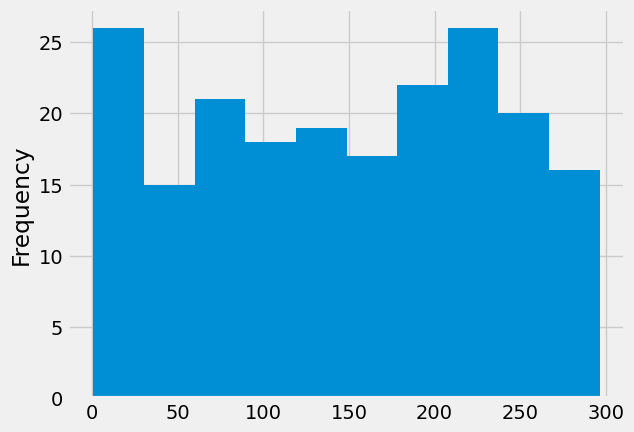

In [10]:
df_simple["TV"].plot(kind="hist")

<Axes: ylabel='Frequency'>

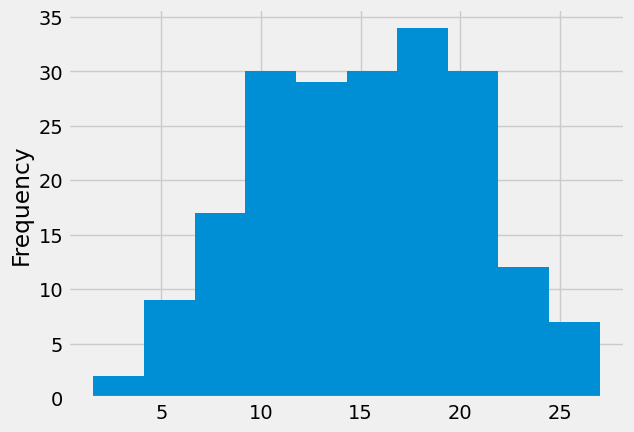

In [11]:
df_simple["Sales"].plot(kind="hist")

In [12]:
lr = LinearRegression()

In [13]:
X = df_simple[["TV"]]
y = df_simple["Sales"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [15]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(X_test)

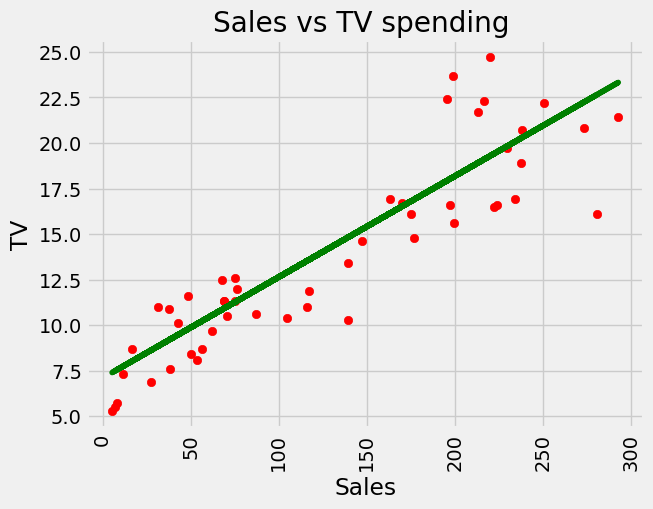

In [16]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, lr.predict(X_test), color = "green")
plt.title("Sales vs TV spending ")
plt.xlabel("Sales")
plt.ylabel("TV")
plt.xticks(rotation=90)
plt.show()

# We can easily see that the regression line fits our data well. But how to measure if it is a good fit for prediction or not?

After fitting a linear regression model, you need to determine how well the model fits the data

In order to measure the performance of our model, we use metrics such as :

## R squared
## Mean Absolute Error
## Mean Squared Error
## Root Mean Squared Error

In [21]:
from sklearn.metrics import r2_score
print("R2 Score is :",round(r2_score(y_test,y_pred),3)*100,"%")

R2 Score is : 79.7 %


In [22]:
df_multiple = pd.read_csv('advertising.csv')
df_multiple.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

In [23]:
X = df_multiple[["TV","Radio","Newspaper"]]
y = df_multiple["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test) # predict test data 
r_squared = r2_score(y_test,y_pred) # calculate r2 score
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)  
print('Adjusted R Squared: %',round(adjusted_r_squared*100,2), 'R Squared: %',round(r_squared*100,2))

Adjusted R Squared: % 91.02 R Squared: % 91.16


# ********************************************************************************************************

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [27]:
df=pd.read_csv('1.04. Real-life example.csv')

In [28]:
df.head()

Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4

In [29]:
# Let's see the description of each columns in dataset
df.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         4345    4173.000000   4345  4345.000000  4195.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           936            NaN   1649          NaN          NaN   
mean           NaN   19418.746935    NaN   161.237284     2.790734   
std            NaN   25584.242620    NaN   105.705797     5.066437   
min            NaN     600.000000    NaN     0.000000     0.600000   
25%            NaN    6999.000000    NaN    86.000000     1.800000   
50%            NaN   11500.000000    NaN   155.000000     2.200000   
75%            NaN   21700.000000    NaN   230.000000     3.000000   
max            NaN  300000.000000    NaN   980.000000    99.990000   

       Engine Type Registration         Year    Model  
count         4345         4345  4345.000000     4345  
unique           4            2          NaN      312  
top         Diesel          yes          NaN  E-Class  
freq          2019         3947          NaN      199  
mean           NaN          NaN  2006.550058      NaN  
std            NaN          NaN     6.719097      NaN  
min            NaN          NaN  1969.000000      NaN  
25%            NaN          NaN  2003.000000      NaN  
50%            NaN          NaN  2008.000000      NaN  
75%            NaN          NaN  2012.000000      NaN  
max            NaN          NaN  2016.000000      NaN

In [30]:
df = df.drop(['Model'],axis=1)

In [32]:
df.isnull().sum()*100/len(df)

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

In [33]:
df.dropna(axis=0, inplace=True)

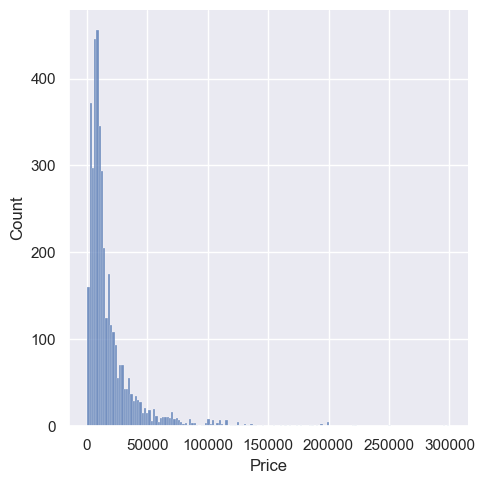

In [34]:
sns.displot(df['Price'])

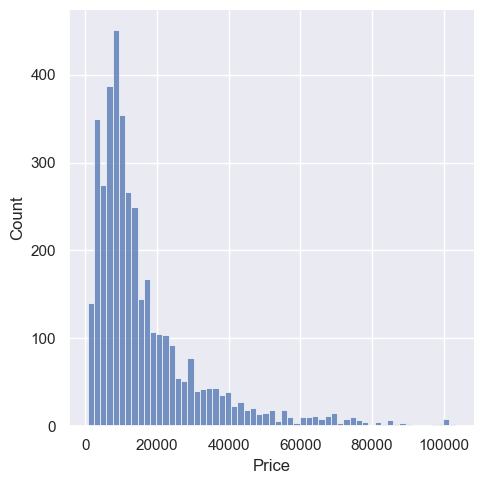

In [35]:
q = df['Price'].quantile(0.98)
df = df[df['Price']<q]
sns.displot(df['Price'])

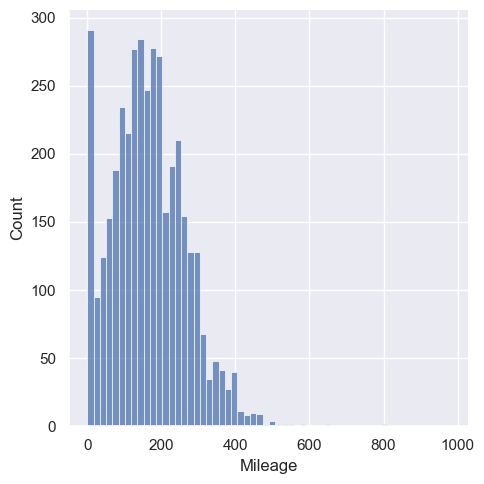

In [36]:
sns.displot(df['Mileage'])

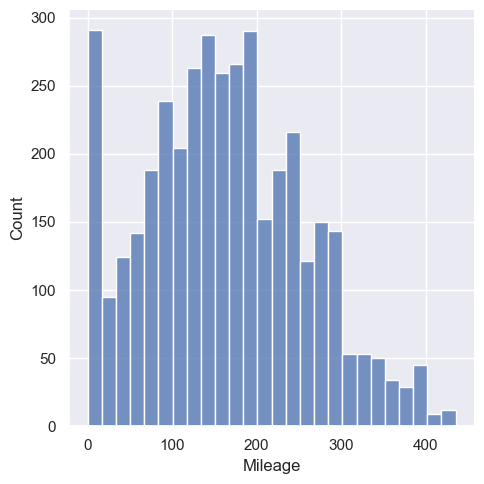

In [38]:
q = df['Mileage'].quantile(0.99)
df = df[df['Mileage']<q]
sns.displot(df['Mileage']);

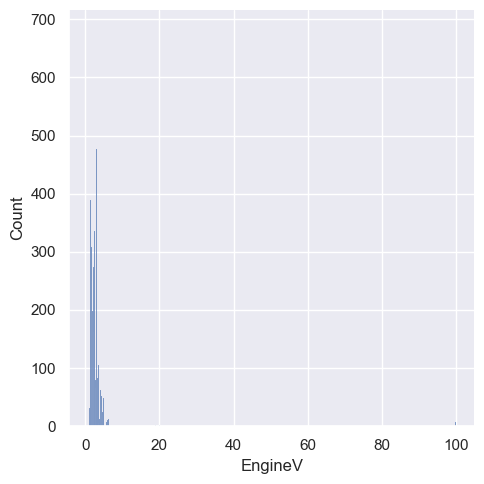

In [40]:
sns.displot(df['EngineV'])

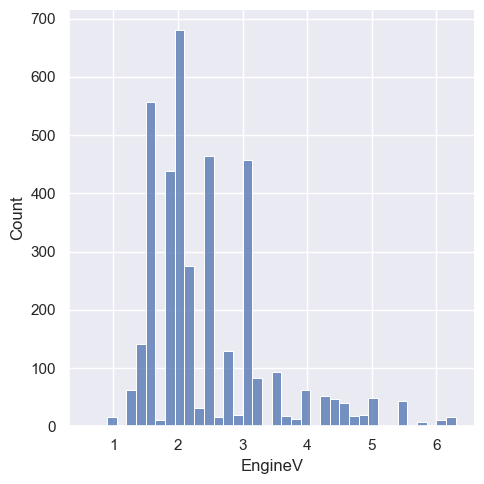

In [41]:
df = df[df['EngineV']<6.5]
sns.displot(df['EngineV'])

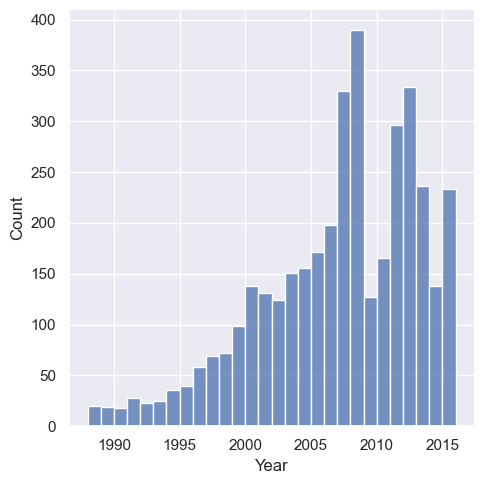

In [42]:
q = df['Year'].quantile(0.01)
df = df[df['Year']>q]
sns.displot(df['Year']);

In [44]:
data_cleaned =  df.reset_index(drop=True)

In [45]:
data_cleaned.describe(include='all')

Brand          Price   Body      Mileage      EngineV  \
count         3826    3826.000000   3826  3826.000000  3826.000000   
unique           7            NaN      6          NaN          NaN   
top     Volkswagen            NaN  sedan          NaN          NaN   
freq           848            NaN   1454          NaN          NaN   
mean           NaN   17171.386333    NaN   162.166231     2.441777   
std            NaN   16396.219278    NaN    94.831169     0.947973   
min            NaN     800.000000    NaN     0.000000     0.600000   
25%            NaN    7200.000000    NaN    94.000000     1.800000   
50%            NaN   11500.000000    NaN   159.000000     2.200000   
75%            NaN   21000.000000    NaN   227.000000     3.000000   
max            NaN  103333.000000    NaN   435.000000     6.300000   

       Engine Type Registration         Year  
count         3826         3826  3826.000000  
unique           4            2          NaN  
top         Diesel          yes          NaN  
freq          1772         3464          NaN  
mean           NaN          NaN  2006.615787  
std            NaN          NaN     6.067533  
min            NaN          NaN  1988.000000  
25%            NaN          NaN  2003.000000  
50%            NaN          NaN  2008.000000  
75%            NaN          NaN  2011.000000  
max            NaN          NaN  2016.000000

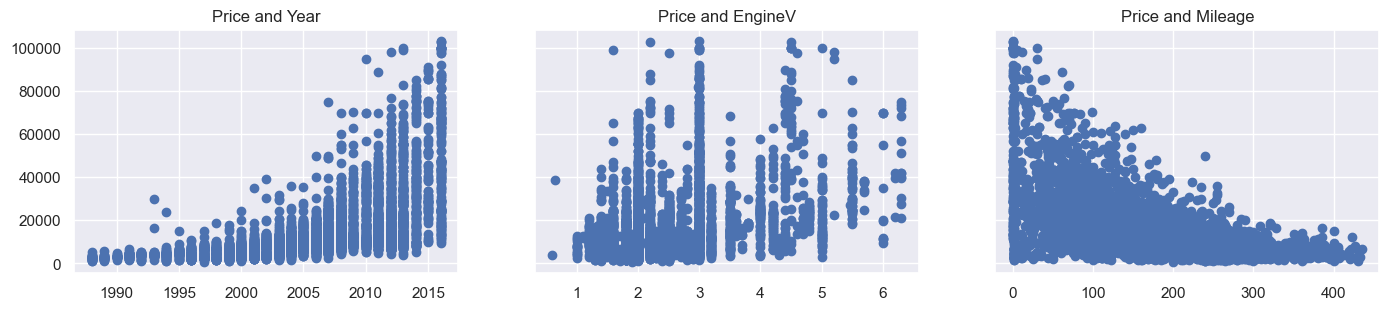

In [46]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [47]:
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price

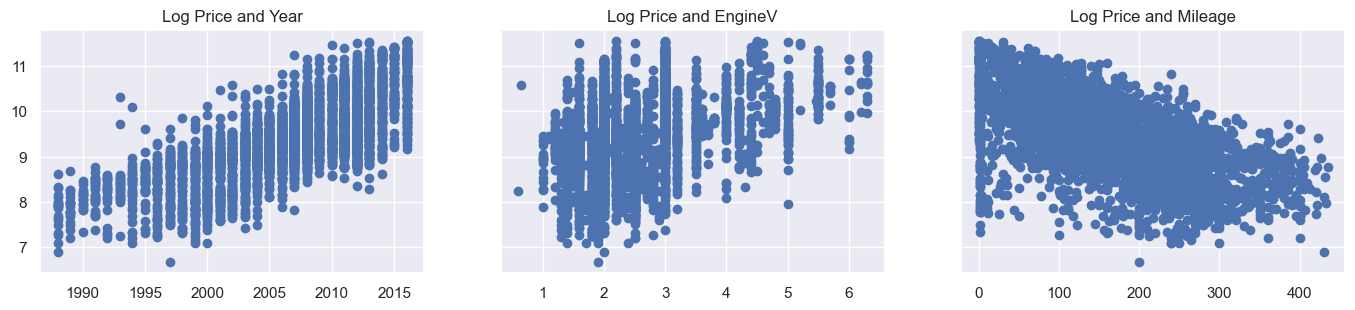

In [48]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [49]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

VIF Features
0   3.899033  Mileage
1  10.307533     Year
2   7.637076  EngineV

In [51]:
data = data_cleaned.drop(['Year'],axis=1)

In [52]:
data =pd.get_dummies(data, drop_first=True)

In [55]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed= data[cols]

In [56]:
targets = data_preprocessed['log_price']

inputs = data_preprocessed.drop(['log_price'],axis=1)

In [57]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

In [58]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Spliting the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [59]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [60]:
y_hat = reg.predict(x_train)

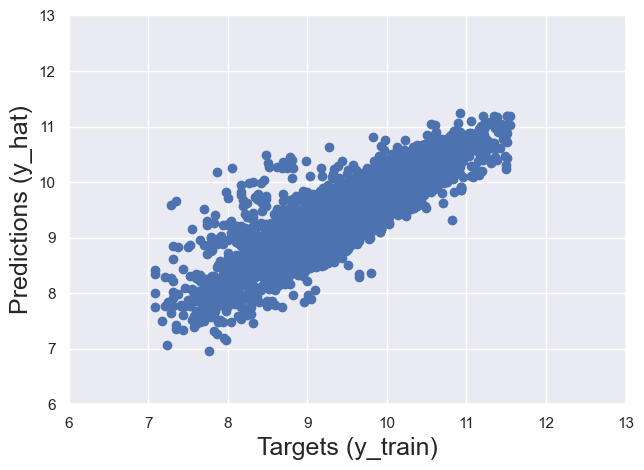

In [61]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

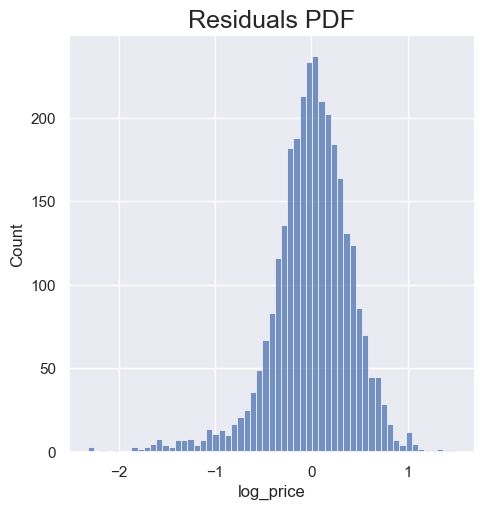

In [62]:
sns.displot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [63]:
score =reg.score(x_train,y_train)
intercept =reg.intercept_
coefficents =reg.coef_
print("Score: ",score)
print("Intercept: ",intercept)
print("Coefficents: ",coefficents)

Score:  0.7494553293190431
Intercept:  9.387782816691688
Coefficents:  [-0.43588103  0.20992556  0.00349    -0.00918508 -0.14030828 -0.1805565
 -0.06326013 -0.09911693 -0.14571937 -0.09759722 -0.19919649 -0.1326728
 -0.16230903 -0.11548866 -0.02457821 -0.14279025  0.31416213]


In [64]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0               Mileage -0.435881
1               EngineV  0.209926
2             Brand_BMW  0.003490
3   Brand_Mercedes-Benz -0.009185
4      Brand_Mitsubishi -0.140308
5         Brand_Renault -0.180556
6          Brand_Toyota -0.063260
7      Brand_Volkswagen -0.099117
8            Body_hatch -0.145719
9            Body_other -0.097597
10           Body_sedan -0.199196
11           Body_vagon -0.132673
12             Body_van -0.162309
13      Engine Type_Gas -0.115489
14    Engine Type_Other -0.024578
15   Engine Type_Petrol -0.142790
16     Registration_yes  0.314162

In [65]:
y_hat_test = reg.predict(x_test)

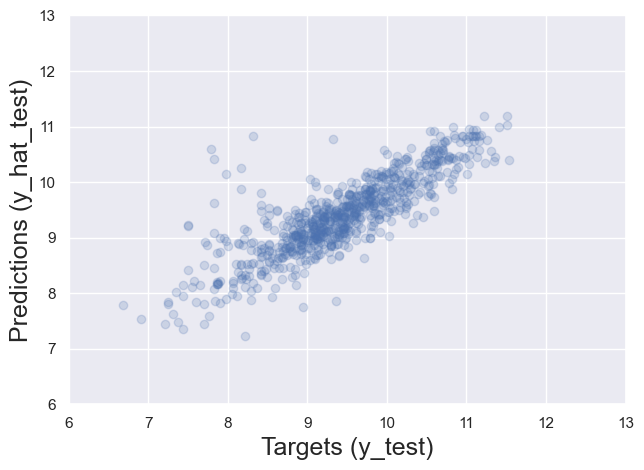

In [66]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [67]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

In [68]:
df_pf['Target'] = np.exp(y_test)
df_pf

Prediction  Target
0    16851.982021     NaN
1     3083.358207  7900.0
2    13699.093320     NaN
3    13010.578900     NaN
4    19365.981091     NaN
..            ...     ...
761   8509.446944     NaN
762  29052.144626  2700.0
763  11875.503539     NaN
764   6517.014266     NaN
765  56328.028274  6950.0

[766 rows x 2 columns]

In [69]:
y_test = y_test.reset_index(drop=True)

In [70]:
df_pf['Target'] = np.exp(y_test)

In [73]:
#For Data Visualization

import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
#For Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# **********************************************************************************

# Data Exploration
As we know, before modelling any data, understanding the data is very important. Data exploration is that step which can tell everything about the data. So let’s start with loading the data.

In [2]:
df=pd.read_csv("insurance (1).csv")

In [3]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

We can see that we have seven variables in the data. Out of the seven, 3 variables are categorical, and 4 are numerical data. Below is an explanation of these variables:

- **Age**: Age of the person.
- **Sex**: Gender of the person.
- **BMI**: Body Mass Index.
- **Children**: Number of children a person has.
- **Smoker**: Smoking habit (yes/no).
- **Region**: Region from which the person belongs.
- **Charges**: Medical cost.
 cost.

In [4]:
df.shape

(1338, 7)

In [5]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

<Axes: >

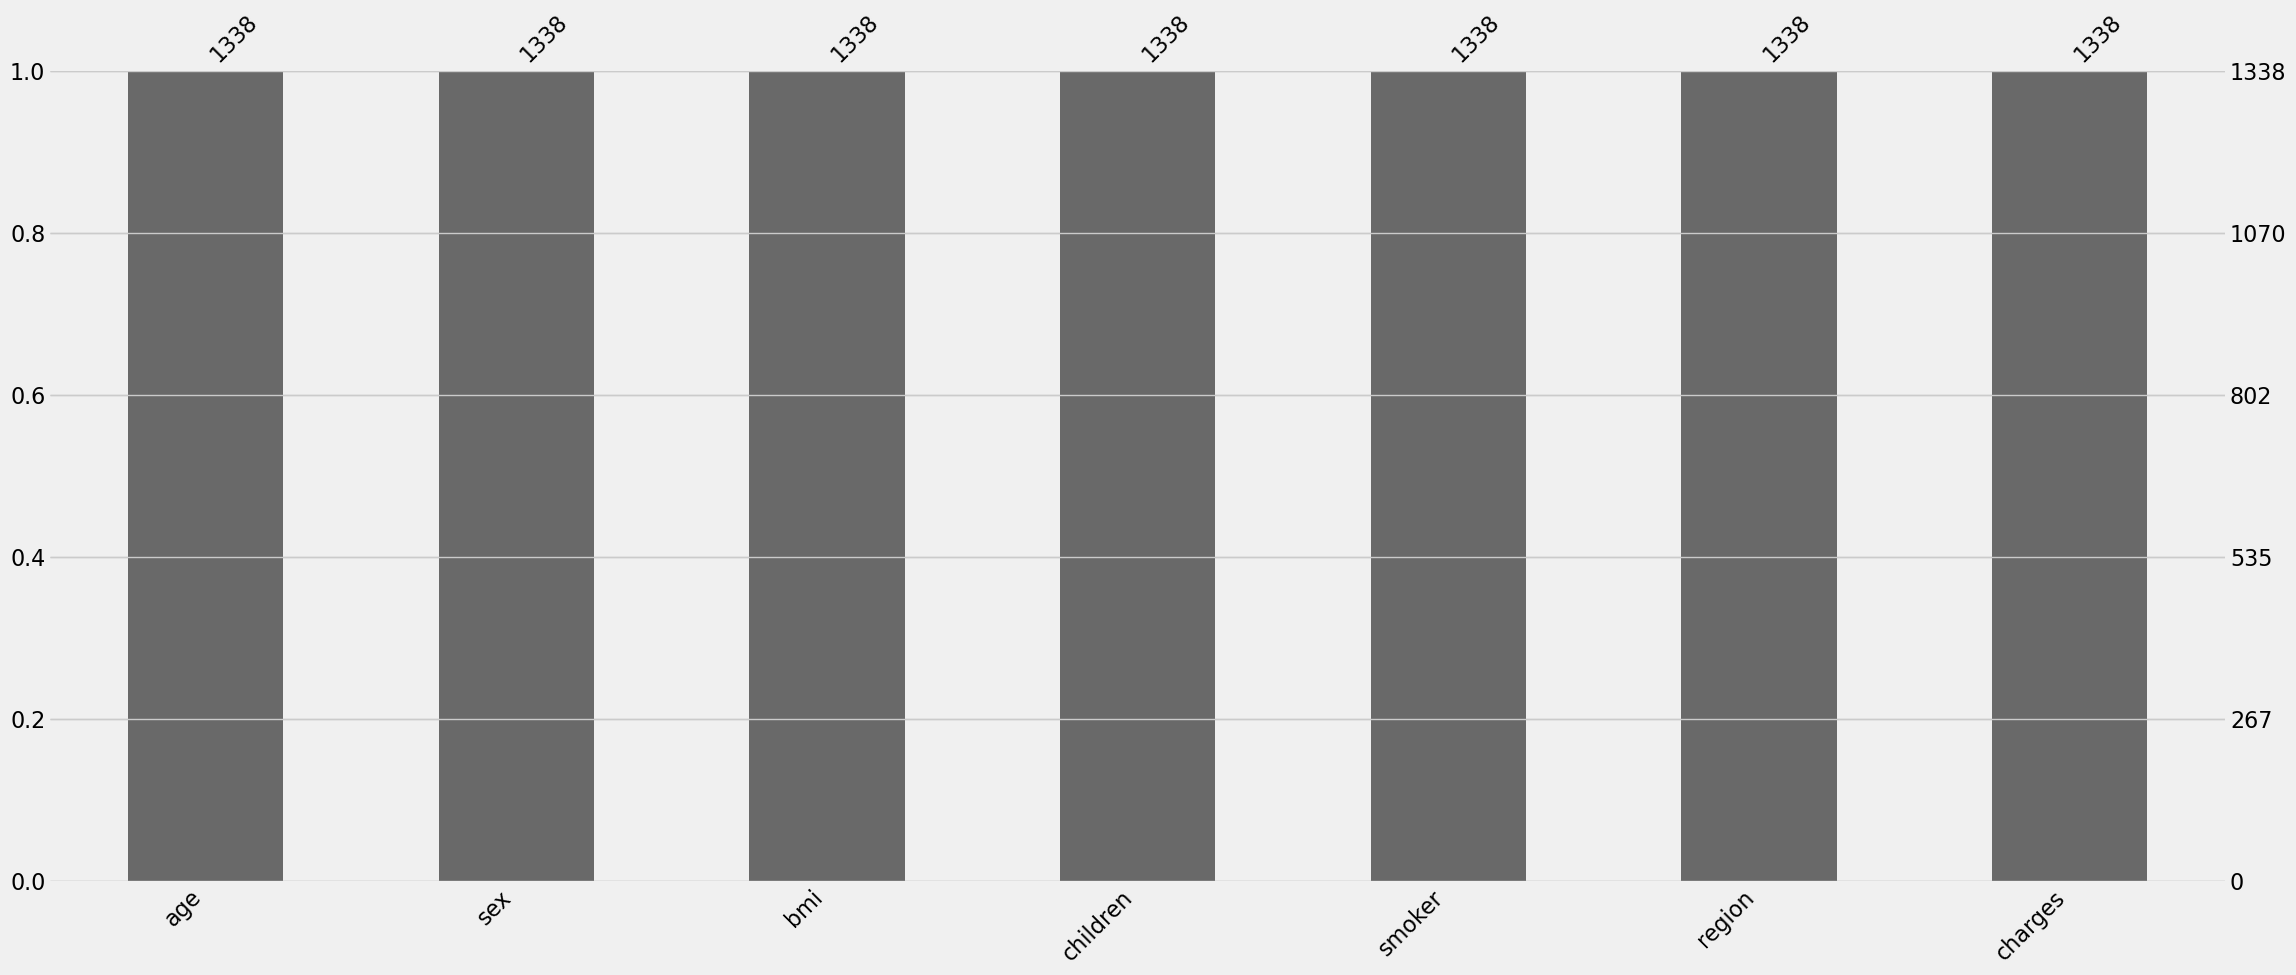

In [8]:
import missingno as ms

ms.bar(df)

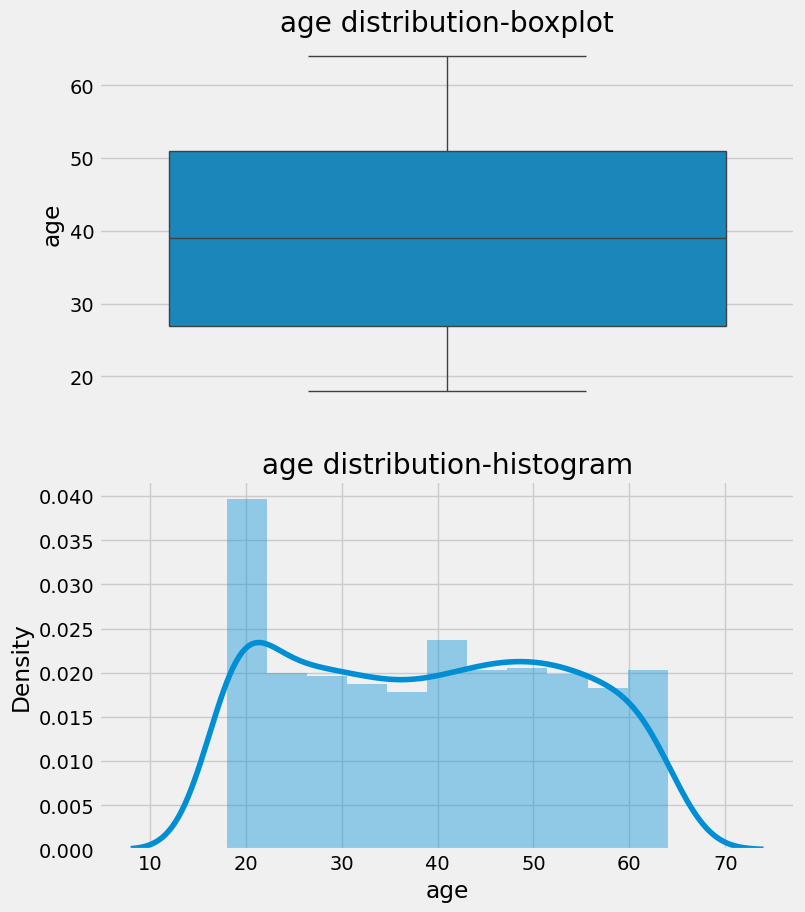

In [9]:
import warnings

import seaborn as sns

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, figsize=(8, 10))

sns.boxplot(df["age"],ax=axs[0]).set(title="age distribution-boxplot")

sns.distplot(df["age"],ax=axs[1]).set(title="age distribution-histogram")

plt.show()

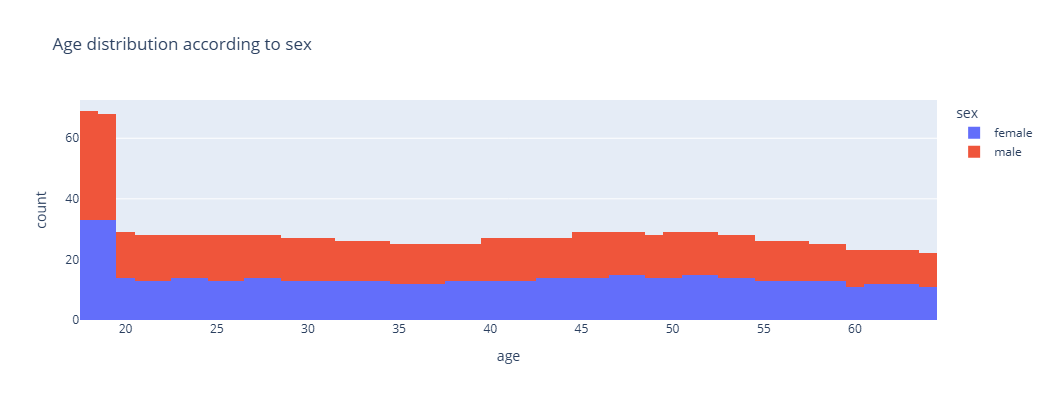

In [10]:
import plotly.express as px

fig = px.histogram(df, x="age", color="sex", title="Age distribution according to sex",nbins = 60,width = 600, height= 400)

fig.show()

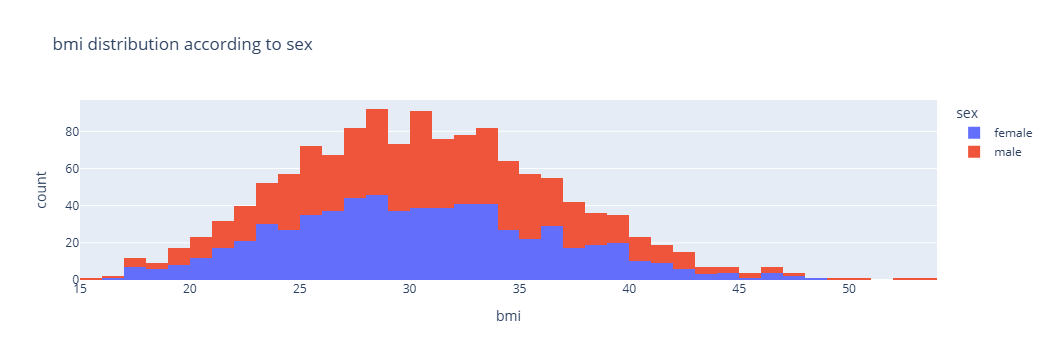

In [11]:
fig = px.histogram(df, x="bmi", color="sex",title='bmi distribution according to sex')

fig.show()

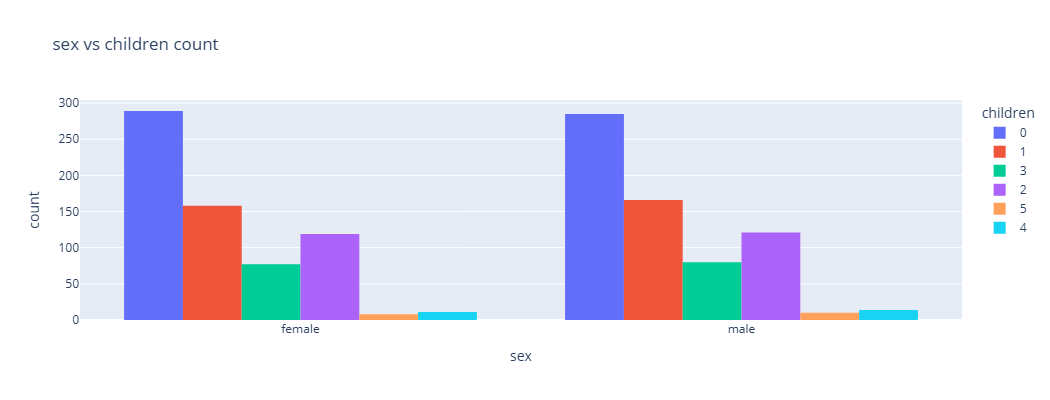

In [13]:
fig = px.histogram(df, x="sex", color="children", barmode='group',title = "sex vs children count",width = 600, height= 400)
fig.show()

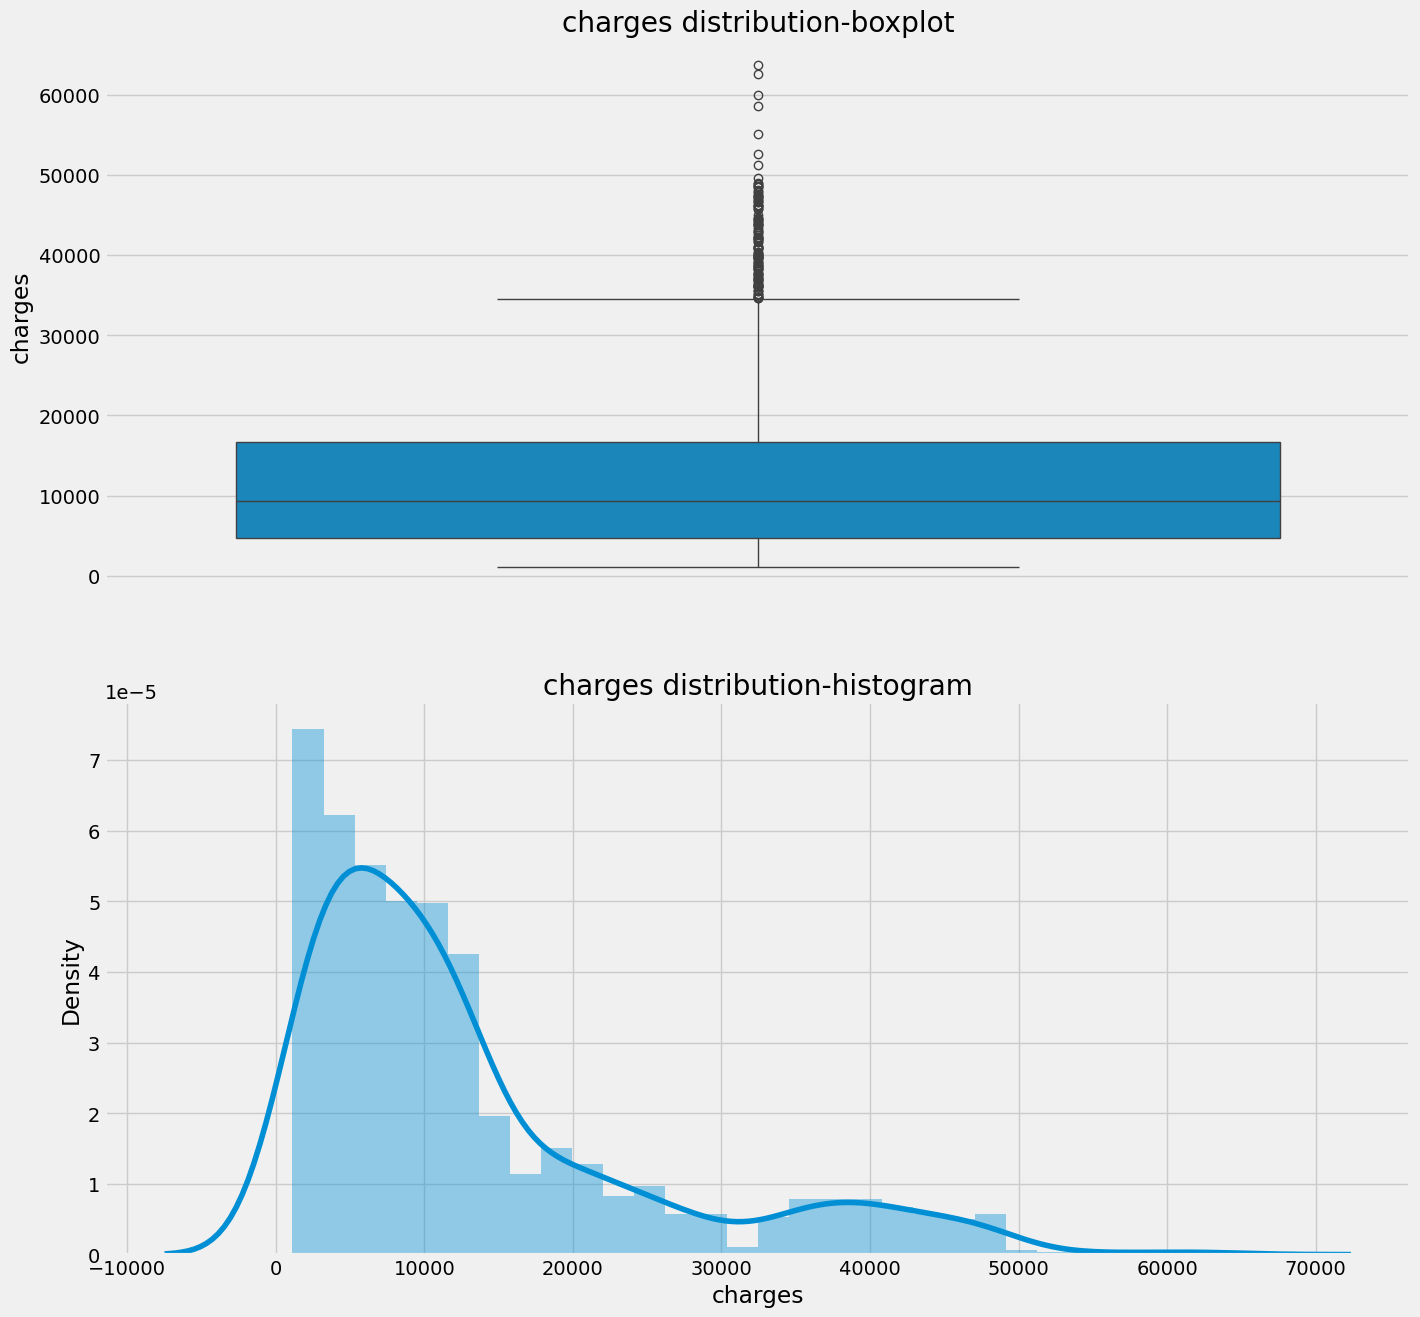

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(15, 15))

sns.boxplot(df['charges'],ax=axs[0]).set(title='charges distribution-boxplot')

sns.distplot(df['charges'],ax=axs[1]).set(title='charges distribution-histogram')

plt.show()


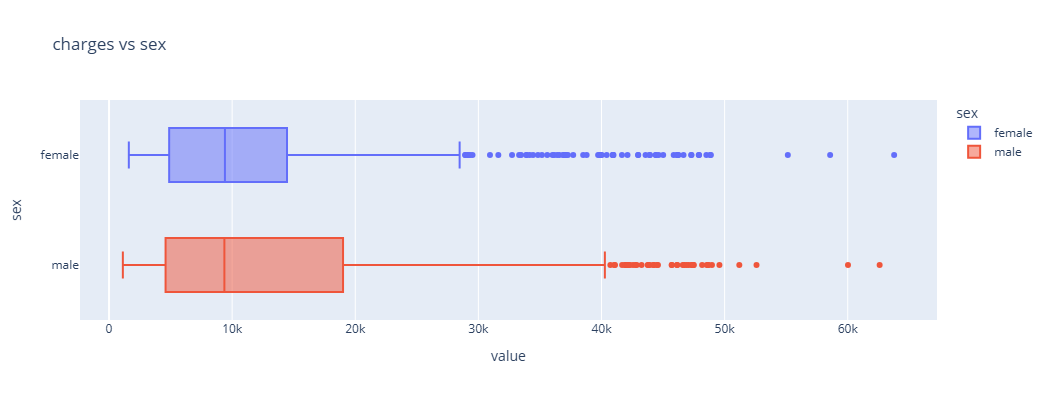

In [15]:
fig = px.box(df, x=['charges'],y=df['sex'],color = 'sex',title = 'charges vs sex',width = 600, height= 400)

fig.show()

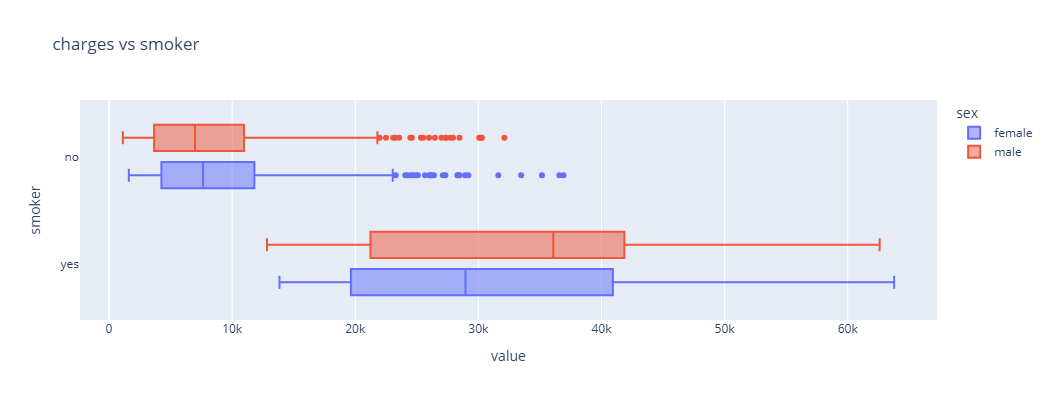

In [16]:
fig = px.box(df, x=['charges'],y=df['smoker'],color = 'sex',title = 'charges vs smoker',width = 600, height= 400)

fig.show()

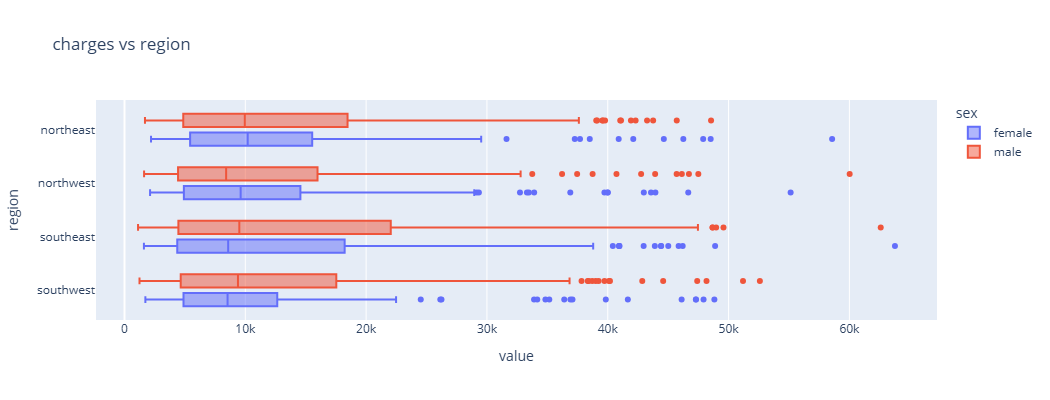

In [17]:
fig = px.box(df, x=['charges'],y=df['region'], color = 'sex',title = 'charges vs region',width = 600, height= 400)

fig.show()

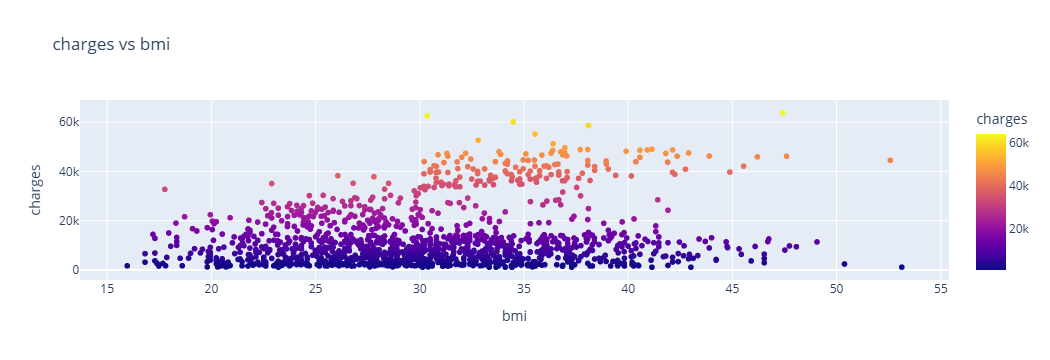

In [19]:
fig=px.scatter(df, y = 'charges', x = 'bmi', color='charges', title = "charges vs bmi")
fig.show()

In [20]:
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

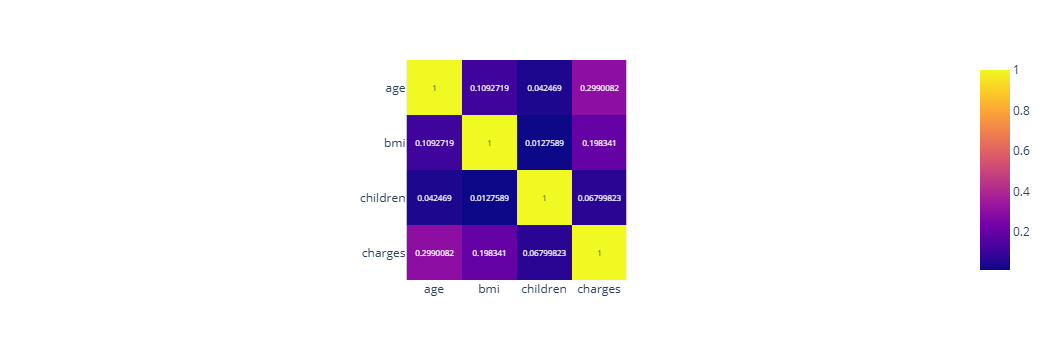

In [24]:
corrmat = df.drop(["sex","smoker","region"],axis=1).corr()

fig = px.imshow(corrmat,text_auto=True)

fig.show()

In [25]:
encoded_data = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',

columns = ['sex','children', 'smoker', 'region'],

drop_first =True,

dtype='int8')

encoded_data

age     bmi      charges  OHE_male  OHE_1  OHE_2  OHE_3  OHE_4  OHE_5  \
0      19  27.900  16884.92400         0      0      0      0      0      0   
1      18  33.770   1725.55230         1      1      0      0      0      0   
2      28  33.000   4449.46200         1      0      0      1      0      0   
3      33  22.705  21984.47061         1      0      0      0      0      0   
4      32  28.880   3866.85520         1      0      0      0      0      0   
...   ...     ...          ...       ...    ...    ...    ...    ...    ...   
1333   50  30.970  10600.54830         1      0      0      1      0      0   
1334   18  31.920   2205.98080         0      0      0      0      0      0   
1335   18  36.850   1629.83350         0      0      0      0      0      0   
1336   21  25.800   2007.94500         0      0      0      0      0      0   
1337   61  29.070  29141.36030         0      0      0      0      0      0   

      OHE_yes  OHE_northwest  OHE_southeast  OHE_southwest  
0           1              0              0              1  
1           0              0              1              0  
2           0              0              1              0  
3           0              1              0              0  
4           0              1              0              0  
...       ...            ...            ...            ...  
1333        0              1              0              0  
1334        0              0              0              0  
1335        0              0              1              0  
1336        0              0              0              1  
1337        1              1              0              0  

[1338 rows x 13 columns]

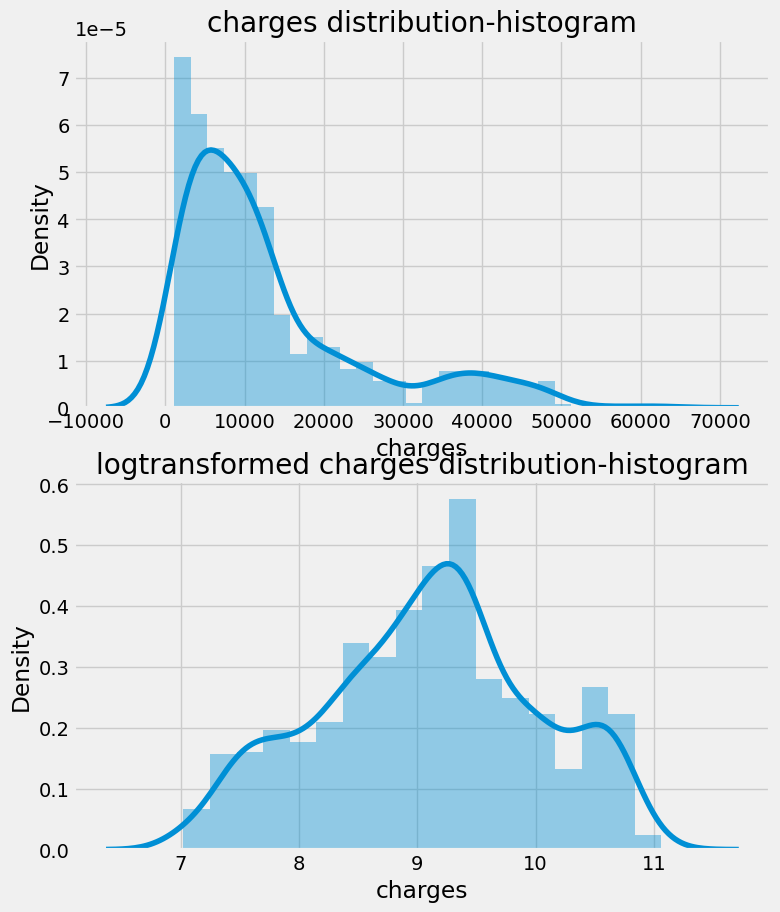

In [26]:
fig, axs = plt.subplots(nrows=2, figsize=(8, 10))

sns.distplot(df['charges'],ax=axs[0]).set(title='charges distribution-histogram')

encoded_data['charges'] = np.log(encoded_data['charges'])

sns.distplot(encoded_data['charges'],ax=axs[1]).set(title='logtransformed charges distribution-histogram')

fig.show()

In [29]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(encoded_data,test_size=0.2, random_state = 42)

X_train = train.drop('charges', axis = 1)

X_test = test.drop('charges', axis = 1)

y_train = train['charges']

y_test = test['charges']

In [30]:
print("shape of train data", X_train.shape, y_train.shape)

print('shape of test data', X_test.shape, y_test.shape)

shape of train data (1070, 12) (1070,)
shape of test data (268, 12) (268,)


In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

#  lets see intercept and slope we make 

In [32]:
parameter = ['theta_'+str(i) for i in range(encoded_data.shape[1])]

X = encoded_data.drop("charges",axis = 1)

columns = ['intersect:x_0=1'] + list(X.columns.values)

skl_theta = [lin_reg.intercept_]+list(lin_reg.coef_)

parameter_df = pd.DataFrame({"Parameter":parameter,"Columns":columns,"theta":skl_theta})

parameter_df

Parameter          Columns     theta
0    theta_0  intersect:x_0=1  7.032266
1    theta_1              age  0.034307
2    theta_2              bmi  0.013534
3    theta_3         OHE_male -0.076882
4    theta_4            OHE_1  0.133926
5    theta_5            OHE_2  0.260226
6    theta_6            OHE_3  0.206718
7    theta_7            OHE_4  0.497620
8    theta_8            OHE_5  0.412804
9    theta_9          OHE_yes  1.554615
10  theta_10    OHE_northwest -0.060865
11  theta_11    OHE_southeast -0.139769
12  theta_12    OHE_southwest -0.125357

In [33]:
y_pred = lin_reg.predict(X_test)

len(y_pred)

268

In [34]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)

print('The Mean Square Error(MSE) is: ',mse)

The Mean Square Error(MSE) is:  0.1743955270332276


In [35]:
R_square = lin_reg.score(X_test,y_test)

print('R square obtain for scikit learn library is :',R_square)

R square obtain for scikit learn library is : 0.8060419975620803


# after fitteing model want to see 4 assumptions of linear regression 

# 1. Linearity
Objective: Ensure that the relationship between the independent variables and the dependent variable is linear.

How to Check:

Plot residuals vs. fitted values.
Plot residuals vs. independent variables if you have them.

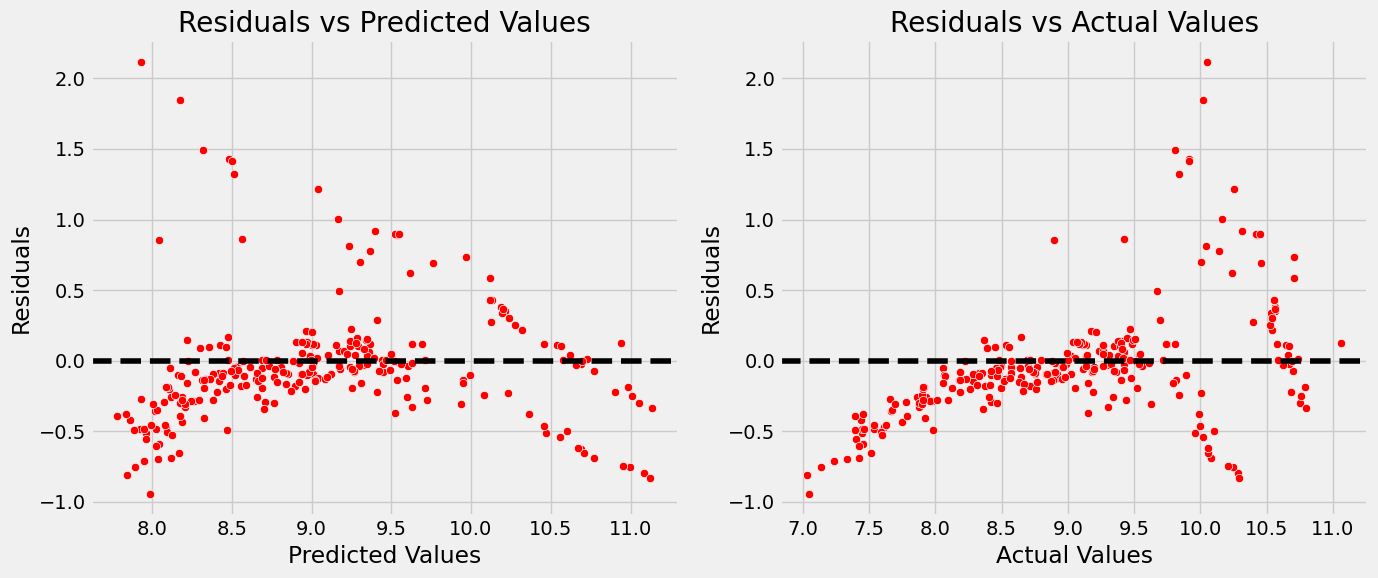

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute residuals
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals, color='r')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Plot residuals vs. actual values if independent variables are not available
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=residuals, color='r')
plt.axhline(y=0, color='k', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


# Homoscedasticity: The residuals should be randomly scattered around the horizontal axis (zero) with no apparent pattern. If you see a clear pattern or systematic structure (like curves or clusters), this indicates non-linearity.

# 2. Homoscedasticity
Objective: Check that the residuals have constant variance.

How to Check:

Use the residuals vs. fitted values plot as shown above.
Perform the Breusch-Pagan test or White test for heteroscedasticity if needed.



# Residuals vs. Fitted Values Plot: A scatter plot where residuals should be evenly distributed around the horizontal line (zero) with constant variance.

Breusch-Pagan Test: This test provides a p-value.

Interpretation:

Plot: If the residuals display a funnel shape (variance increasing or decreasing with fitted values), it indicates heteroscedasticity.
Breusch-Pagan Test:
p-value > 0.05: Fail to reject the null hypothesis; residuals have constant variance (homoscedasticity).
p-value ≤ 0.05: Reject the null hypothesis; there is evidence of heteroscedasticity (non-constant variance).

In [43]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create a DataFrame with residuals and predicted values for testing
import pandas as pd
df = pd.DataFrame({'predicted': y_pred, 'residuals': residuals})

# Fit a model to the residuals to check for heteroscedasticity
bp_test = sm.stats.diagnostic.het_breuschpagan(df['residuals'], sm.add_constant(df['predicted']))
print(f'Breusch-Pagan test p-value: {bp_test[1]}')


Breusch-Pagan test p-value: 0.084486415350706


# 3. Independence
Objective: Ensure that residuals are independent.

How to Check:

Use the Durbin-Watson test for autocorrelation.


# Durbin-Watson Statistic: A statistic that ranges from 0 to 4.
Interpretation:

Value around 2: Indicates no autocorrelation (good).
Value < 2: Indicates positive autocorrelation.
Value > 2: Indicates negative autocorrelation.
Rule of Thumb: Values close to 2 (e.g., 1.5 to 2.5) are typically acceptable; values closer to 0 or 4 suggest serious autocorrelation issues.

In [44]:
from statsmodels.stats.stattools import durbin_watson

# Compute Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic}')


Durbin-Watson statistic: 2.2326989132237025


# 4. Normality
Objective: Check if residuals are normally distributed.

How to Check:

Plot a Q-Q plot.
Plot a histogram of residuals.
Perform statistical tests for normality (e.g., Shapiro-Wilk test).



# Q-Q Plot: A plot comparing the quantiles of residuals to the quantiles of a normal distribution.

Histogram of Residuals: A histogram showing the distribution of residuals.

Shapiro-Wilk Test: A statistical test providing a p-value.

Interpretation:

Q-Q Plot: Points should lie approximately along the straight line. Deviations from the line suggest non-normality.
Histogram: The distribution of residuals should roughly resemble a bell curve (normal distribution).
Shapiro-Wilk Test:
p-value > 0.05: Fail to reject the null hypothesis; residuals are approximately normally distributed.
p-value ≤ 0.05: Reject the null hypothesis; residuals are not normally distributed.

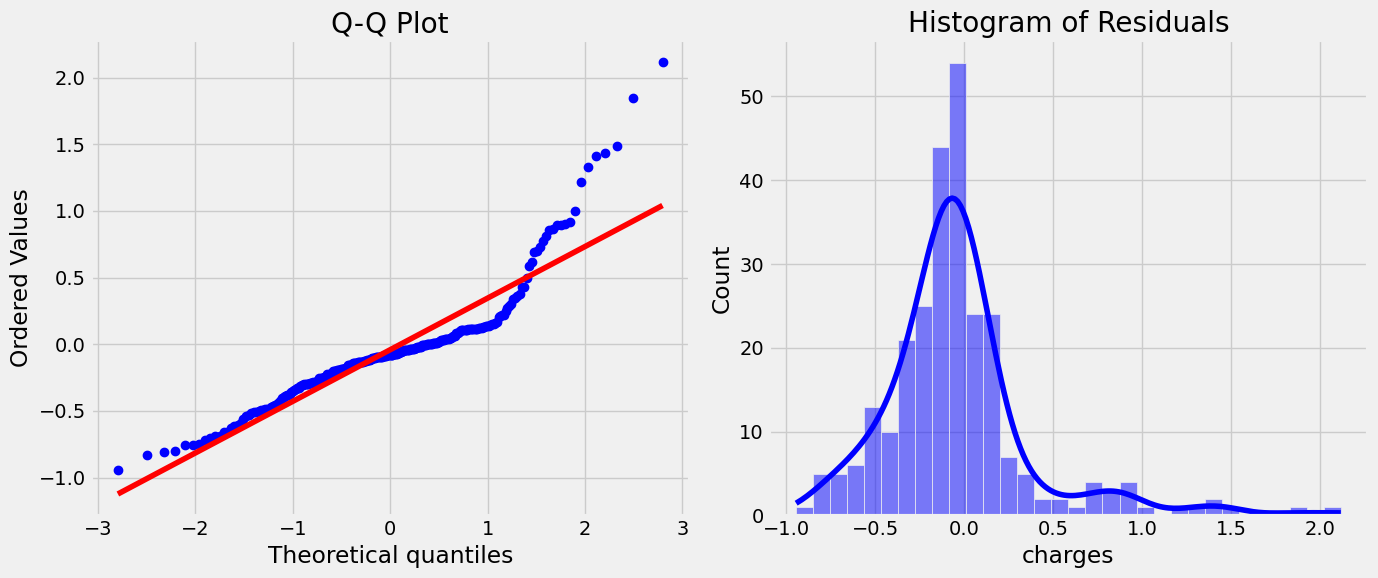

Shapiro-Wilk test p-value: 3.770592245241042e-15


In [45]:
import scipy.stats as stats

# Q-Q plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
stats.probplot(residuals, dist="norm", plot=plt.gca())
plt.title('Q-Q Plot')

# Histogram of residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='b')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk test p-value: {shapiro_test.pvalue}')


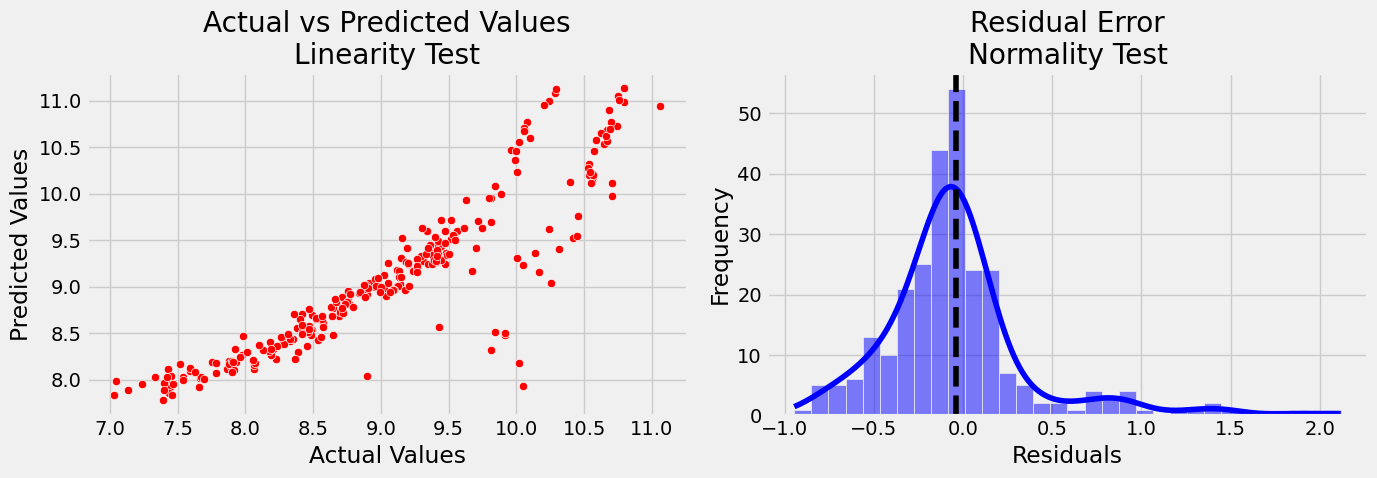

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
f = plt.figure(figsize=(14, 5))

# Scatter plot for Actual vs Predicted values
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Actual vs Predicted Values\nLinearity Test')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

# Histogram for Residuals
ax = f.add_subplot(122)
sns.histplot((y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Residual Error\nNormality Test')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()